<a href="https://colab.research.google.com/github/shaukat39/AI_Fraud_Risk_Analyzer/blob/main/fraud_analyzer_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🕵️‍♂️ AI-Powered Fraud Risk Analyzer Demo

This notebook lets you test the core logic of a production-grade fraud detection system. You'll simulate predictions, run feature engineering, and calculate business ROI—all interactively.

✅ No deployment needed  
✅ Works with or without a trained model  
✅ Ideal for testing, showcasing, and teaching

In [1]:
import numpy as np
import pandas as pd
import joblib
import json
from functools import lru_cache
import matplotlib.pyplot as plt

In [2]:
# Load pre-trained model (optional)
try:
    model = joblib.load("fraud_model.pkl")
except:
    class DummyModel:
        def predict_proba(self, X):
            return np.random.rand(len(X), 2)
    model = DummyModel()

In [3]:
@lru_cache(maxsize=1000)
def cached_feature_engineering(user_id, amount, merchant_id, payment_method):
    return pd.DataFrame([{
        "user_id": hash(user_id) % 1000,
        "amount": amount,
        "merchant_id": hash(merchant_id) % 1000,
        "payment_method": {"credit_card": 1, "debit_card": 0}.get(payment_method, 0)
    }])

In [4]:
def predict_fraud(user_id, amount, merchant_id, payment_method):
    features = cached_feature_engineering(user_id, amount, merchant_id, payment_method)
    score = model.predict_proba(features)[0][1]
    risk = "HIGH" if score > 0.7 else "MEDIUM" if score > 0.4 else "LOW"
    return {"fraud_score": round(score, 3), "risk_level": risk}

In [5]:
class BusinessImpactCalculator:
    def __init__(self, system_cost_monthly=10000, false_positive_cost=5, fraud_investigation_cost=50):
        self.system_cost_monthly = system_cost_monthly
        self.false_positive_cost = false_positive_cost
        self.fraud_investigation_cost = fraud_investigation_cost

    def calculate_roi(self, prevented_fraud_amount, false_positives, fraud_cases):
        total_costs = (
            self.system_cost_monthly +
            false_positives * self.false_positive_cost +
            fraud_cases * self.fraud_investigation_cost
        )
        net_benefit = prevented_fraud_amount - total_costs
        roi = (net_benefit / total_costs) * 100 if total_costs else 0
        break_even_days = (total_costs / (prevented_fraud_amount / 30)) if prevented_fraud_amount > 0 else 0
        return {
            "prevented_fraud": prevented_fraud_amount,
            "total_costs": total_costs,
            "net_benefit": net_benefit,
            "roi_percentage": round(roi, 2),
            "break_even_days": round(break_even_days, 2)
        }

In [6]:
# Simulate a prediction
result = predict_fraud("user_123", 250.50, "merchant_abc", "credit_card")
print("Prediction:", result)

# Simulate ROI calculation
calculator = BusinessImpactCalculator()
roi_result = calculator.calculate_roi(prevented_fraud_amount=50000, false_positives=120, fraud_cases=80)
print("Business Impact:", roi_result)

Prediction: {'fraud_score': np.float64(0.656), 'risk_level': 'MEDIUM'}
Business Impact: {'prevented_fraud': 50000, 'total_costs': 14600, 'net_benefit': 35400, 'roi_percentage': 242.47, 'break_even_days': 8.76}


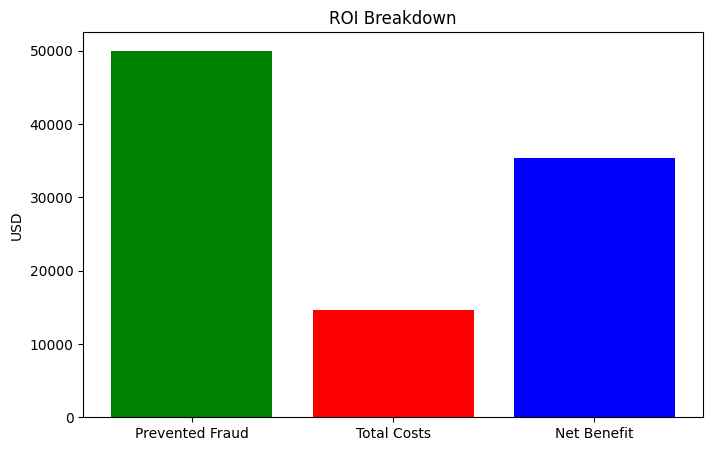

In [7]:
labels = ["Prevented Fraud", "Total Costs", "Net Benefit"]
values = [roi_result["prevented_fraud"], roi_result["total_costs"], roi_result["net_benefit"]]
colors = ["green", "red", "blue"]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=colors)
plt.title("ROI Breakdown")
plt.ylabel("USD")
plt.show()